In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load semua data
retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_1_until_3.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_4_until_6.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_7_until_9.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_10_until_12.csv')

C:\Users\Rio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Cek sample data 5 baris teratas)
print('PENGECEKAN DATA\n\n', retail_data1.head())

PENGECEKAN DATA

    order_id order_date  customer_id             city     province product_id  \
0   1612339   01-01-19        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339   01-01-19        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339   01-01-19        18055  Jakarta Selatan  DKI Jakarta      P1508   
3   1612339   01-01-19        18055  Jakarta Selatan  DKI Jakarta      P0520   
4   1612339   01-01-19        18055  Jakarta Selatan  DKI Jakarta      P1513   

     brand  quantity  item_price  total_price  
0  BRAND_C         4     1934000      7736000  
1  BRAND_V         8      604000      4832000  
2  BRAND_G        12      747000      8964000  
3  BRAND_B        12      450000      5400000  
4  BRAND_G         3     1500000      4500000  


In [4]:
#Gabung semua dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_data1,retail_data2,retail_data3,retail_data4])
print('Jumlah baris:', retail_table.shape[0])

#Dataframe info
print('\nInfo:', retail_table.info())

Jumlah baris: 508557
<class 'pandas.core.frame.DataFrame'>
Int64Index: 508557 entries, 0 to 201825
Data columns (total 10 columns):
order_id       508557 non-null object
order_date     508557 non-null object
customer_id    508557 non-null int64
city           508557 non-null object
province       508557 non-null object
product_id     508557 non-null object
brand          508557 non-null object
quantity       508557 non-null int64
item_price     508557 non-null int64
total_price    508557 non-null int64
dtypes: int64(4), object(6)
memory usage: 42.7+ MB

Info: None


In [5]:
#Transformasi Data
print('TRANSFORMASI DATA')
#Periksa data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
print('\nitem_price < 0 atau total_price < 0:\n', cek)

TRANSFORMASI DATA

item_price < 0 atau total_price < 0:
         order_id order_date  customer_id     city province product_id  \
83664  undefined   06-09-19            0  unknown  unknown      P0153   
83665  undefined   06-09-19            0  unknown  unknown      P0153   

         brand  quantity  item_price  total_price  
83664  BRAND_A         1 -3871709000  -3871709000  
83665  BRAND_A         1 -3871709000  -3871709000  


In [6]:
#Jika tidak masuk akal datanya dapat dihapus
if cek.shape[0] != 0:
    retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

In [7]:
#Cek order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('\norder_id yang bernilai undefined:\n', cek)


order_id yang bernilai undefined:
         order_id order_date  customer_id     city province product_id  \
83663  undefined   06-09-19            0  unknown  unknown      P0153   

         brand  quantity  item_price  total_price  
83663  BRAND_A         1  3871733000   3871733000  


In [8]:
# Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
    retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

In [9]:
# Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')

# Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

# Cek dataframe info kembali untuk memastikan
print('\nInfo:', retail_table.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 508554 entries, 0 to 201825
Data columns (total 10 columns):
order_id       508554 non-null int64
order_date     508554 non-null datetime64[ns]
customer_id    508554 non-null int64
city           508554 non-null object
province       508554 non-null object
product_id     508554 non-null object
brand          508554 non-null object
quantity       508554 non-null int64
item_price     508554 non-null int64
total_price    508554 non-null int64
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 42.7+ MB

Info: None


In [10]:
#Filter 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

#Pastikan kolom province sama dengan java
print(retail_table['province'].unique())


FILTER 5 PROVINCE TERBESAR DI PULAU JAWA

['DKI Jakarta' 'Jawa Barat' 'Jawa Timur' 'Yogyakarta' 'Jawa Tengah']


In [11]:
#Kelompokkan sesuai order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})

#Standarisasi nama kolom
groupby_city_province.columns = ['order','customer','product','brand','GMV']
print('\ngroupby_city_province (10 data teratas):\n', groupby_city_province.head(10))

# Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack('province').fillna(0)

print('\nunstack_city_province (5 data teratas):\n', unstack_city_province.head())


groupby_city_province (10 data teratas):
                         order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     34        33      328     22  4717083000
           Jawa Barat      11         9      136     18  1557289000
           Jawa Tengah      4         4      116     20   352052000
           Jawa Timur       6         6       83     15  1106603000
           Yogyakarta       7         4       88     16  9454007000
2019-01-02 DKI Jakarta     17        17      259     22  1877858000
           Jawa Barat      10         9      194     22  1290147000
           Jawa Tengah      4         3       49     15  1813991000
           Jawa Timur       6         6       63     19   663106000
           Yogyakarta       2         2       56     19   549622000

unstack_city_province (5 data teratas):
                  order                                               \
province   DKI Jakarta Jawa 

In [12]:
#Slicing data order
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
print('\nby order (5 data teratas):\n', by_order.head())

#Resampling pada data dan lakukan perhitungan rata-rata bulanan
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())


by order (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         34.0        11.0          4.0         6.0         7.0
2019-01-02         17.0        10.0          4.0         6.0         2.0
2019-01-03         11.0         4.0         10.0         5.0         6.0
2019-01-04         30.0         7.0          8.0         1.0         8.0
2019-01-05         21.0         8.0          2.0         3.0         2.0

by_order_monthly_mean (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-31    21.526316    8.684211     4.421053    3.473684    4.368421
2019-02-28    24.391304    8.173913     3.652174    3.869565    4.130435
2019-03-31    25.111111    7.481481     3.703704    4.370370    3.740741
2019-04-30    25.884615    9.807692     4.538462    4

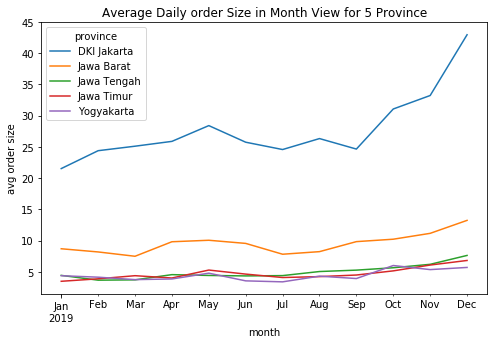

In [13]:
#Visualisasi rata-rata bulanan
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily order Size in Month View for 5 Province'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

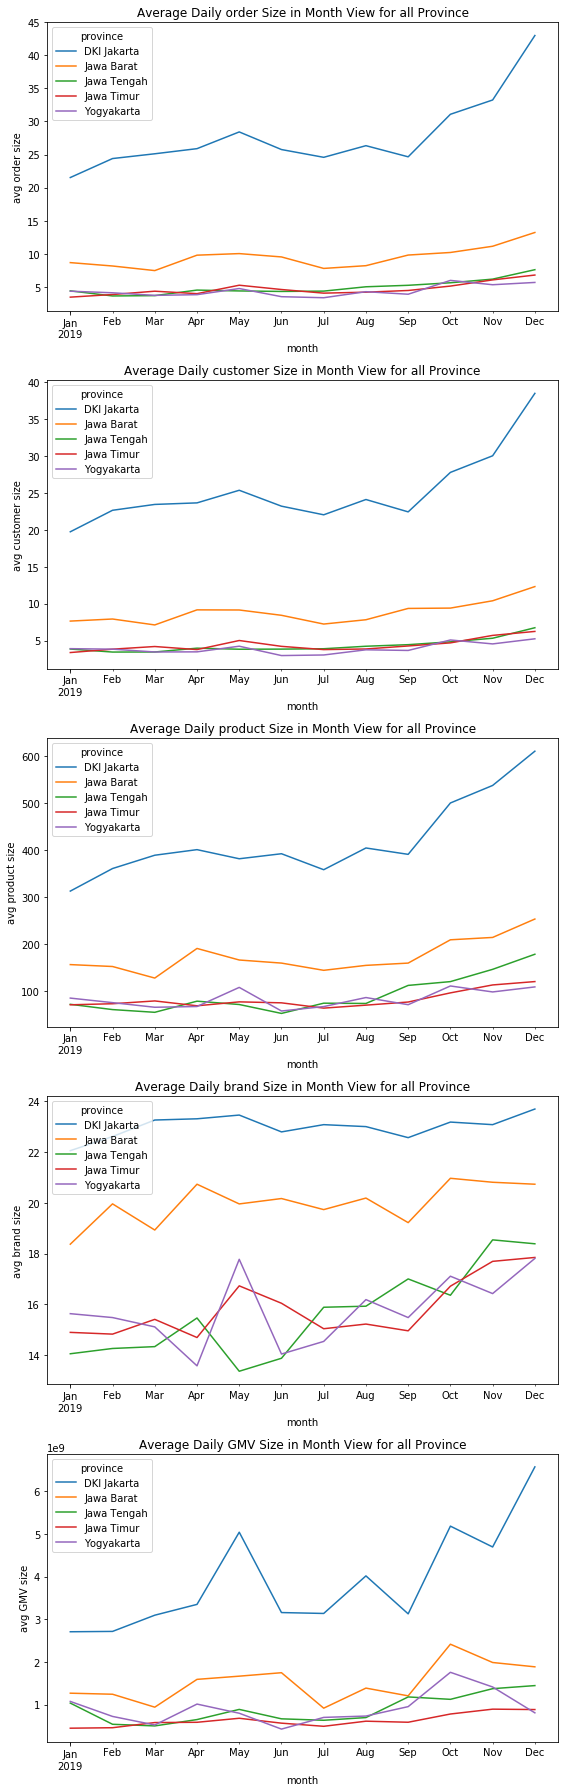

In [14]:
#Buat canvas untuk 5 line plot
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# Slicing index
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    
    # Slicing data masing-masing measurement
    by_measurement = unstack_city_province.loc[:,idx[measurement]]
    
    # Resampling pada data untuk dilakukan perhitungan rata-rata bulanan
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    
    # Visualisasi
    by_measurement_monthly_mean.plot(
    title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
    ax = axes[i]
    )
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')
    
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()